# Lab 5.2 Data Assembly II

## By now, you should be able to load data into Pandas and do some basic visualizations. We will focus on various data cleaning and curation tasks.

## This session will cover:

1. Concatenating data
2. Advsance merging of data sets

# 1. Let's load and install some libraries

In [1]:
import pandas as pd

# 2. Let's load some datasets

In [2]:
## The air_quality_no2_long.csv data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.
air_quality_no2 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_no2_long.csv',parse_dates=True)

In [3]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [4]:
## The air_quality_pm25_long.csv data set provides 𝑃𝑀25 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

air_quality_pm25 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_pm25_long.csv',parse_dates=True)

In [5]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [6]:
## The air quality measurement station coordinates are stored in a data file air_quality_stations.csv

stations_coord = pd.read_csv("https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_stations.csv")

In [7]:
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [8]:
## The air quality parameters metadata are stored in a data file air_quality_parameters.csv

air_quality_parameters = pd.read_csv("https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_parameters.csv")

In [9]:
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


# 3. Concatenation

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_concat_row1.svg">



## We want to combine the measurements of 𝑁𝑂2 and 𝑃𝑀25, two tables with a similar structure, in a single table

In [10]:
## the parameter axis=0 indicates concatenation by rows.
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [11]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


# 4. Join

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">



## We want to add the station coordinates, provided by the stations metadata table, to the corresponding rows in the measurements table.

In [12]:
air_quality_geolocated = pd.merge(air_quality, stations_coord,how='left', on='location')

In [13]:
air_quality_geolocated

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193


## We want to add the parameter full description and name, provided by the parameters metadata table, to the measurements table

In [14]:
air_quality_complete = pd.merge(air_quality_geolocated, air_quality_parameters,how='left', left_on='parameter', right_on='id')

In [15]:
air_quality_complete

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2


# 5. Challenge yourself ! 

## 5.1. Can you plot the evolution of air quality accross time and city ?

### Hint refer to the pandas documentation

https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html

In [16]:
air_quality_complete['date.utc']=pd.to_datetime(air_quality_complete['date.utc'])

In [17]:
air_quality_complete

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2


In [25]:
Grouped=air_quality_complete.groupby(['city','parameter'])[['value','date.utc']].count()

In [26]:
Grouped

value  date.utc
city      parameter                 
Antwerpen no2           95        95
          pm25         101       101
London    no2          969       969
          pm25        1009      1009
Paris     no2         2008      2008

In [20]:
air_quality_complete.head(2)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5


In [27]:
Ready=air_quality_complete[['city','parameter','value','date.utc']]

In [28]:
Ready

,city,parameter,value,date.utc
0,Antwerpen,pm25,18.0,2019-06-18 06:00:00+00:00
1,Antwerpen,pm25,6.5,2019-06-17 08:00:00+00:00
2,Antwerpen,pm25,18.5,2019-06-17 07:00:00+00:00
3,Antwerpen,pm25,16.0,2019-06-17 06:00:00+00:00
4,Antwerpen,pm25,7.5,2019-06-17 05:00:00+00:00
...,...,...,...,...
4177,London,no2,26.0,2019-05-07 06:00:00+00:00
4178,London,no2,16.0,2019-05-07 04:00:00+00:00
4179,London,no2,19.0,2019-05-07 03:00:00+00:00
4180,London,no2,19.0,2019-05-07 02:00:00+00:00


In [30]:
PM=Ready['parameter']=='pm25'

In [31]:
PM

0        True
1        True
2        True
3        True
4        True
        ...  
4177    False
4178    False
4179    False
4180    False
4181    False
Name: parameter, Length: 4182, dtype: bool

In [51]:
PMReady=air_quality_complete[PM]

In [32]:
NO=Ready['parameter']=='no2'

In [33]:
NO

0       False
1       False
2       False
3       False
4       False
        ...  
4177     True
4178     True
4179     True
4180     True
4181     True
Name: parameter, Length: 4182, dtype: bool

In [53]:
NOReady=air_quality_complete[NO]

In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
import seaborn as sns

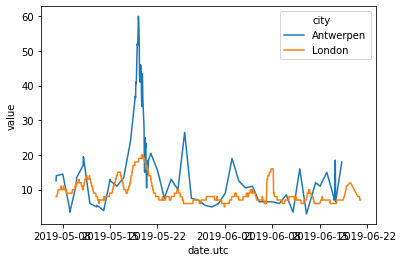

In [52]:
sns.lineplot(data=PMReady, x="date.utc", y="value", hue='city')

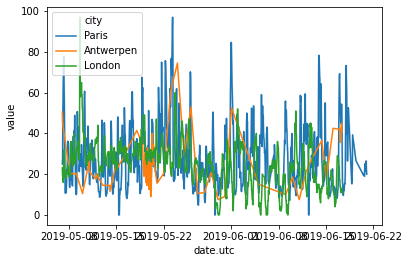

In [54]:
sns.lineplot(data=NOReady, x="date.utc", y="value", hue='city')